## K-means clustering algorithm of Customer Segmentation

### importing neccesary libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
import os
warnings.filterwarnings("ignore")

### import dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Handling null values

In [8]:
df.isnull().any( )

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [9]:
df.isnull().sum( )

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Data visualization

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

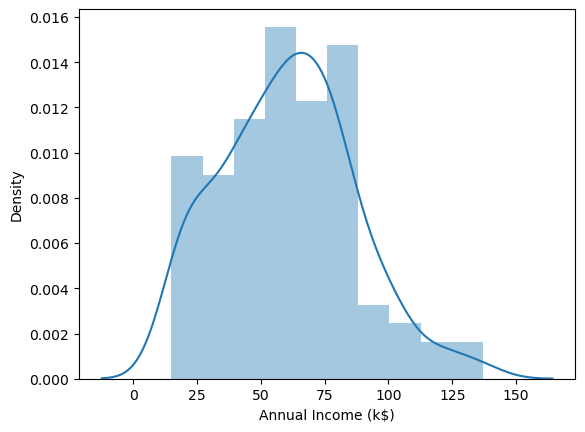

In [10]:
sns.distplot(df['Annual Income (k$)'])

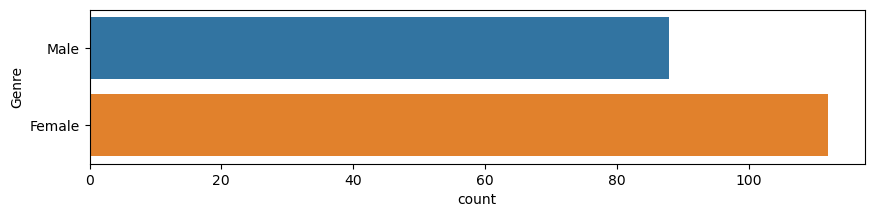

In [11]:
plt.figure(1 , figsize = (10 , 2))
sns.countplot(y = 'Genre' , data = df)
plt.show()

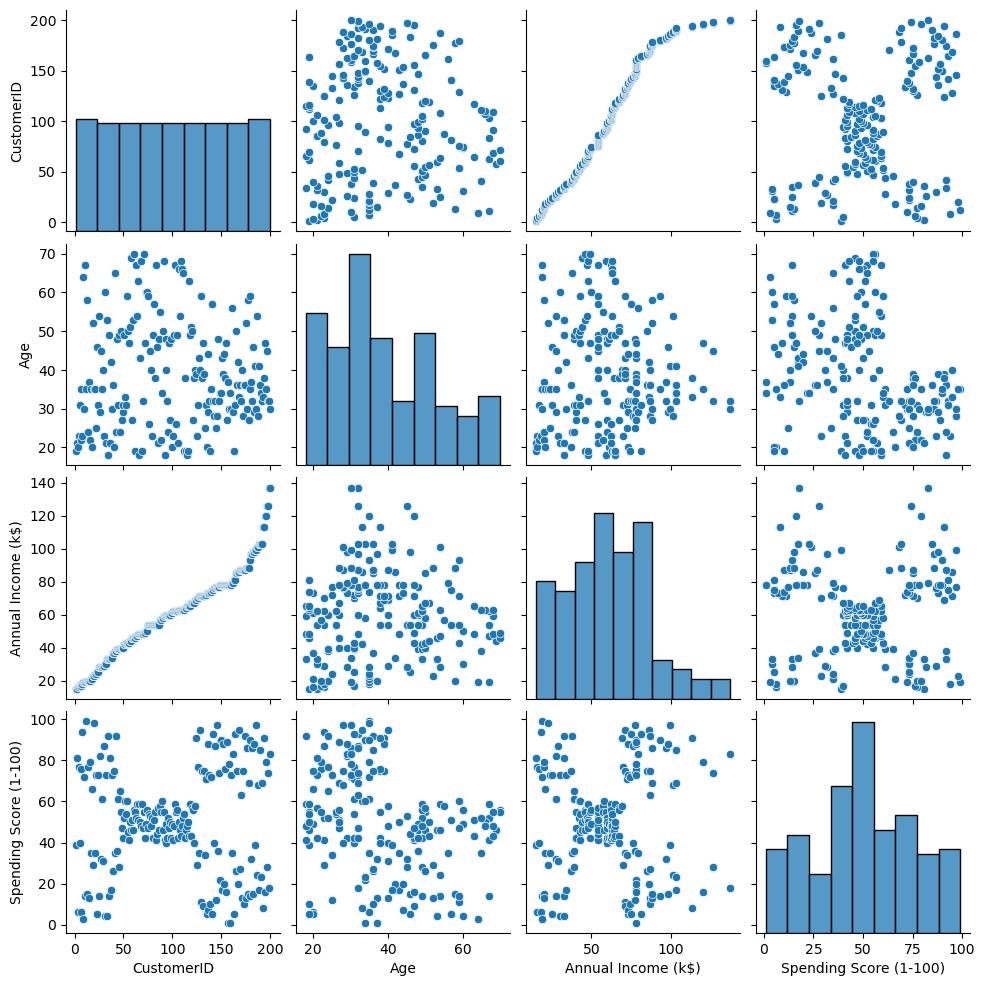

In [12]:
sns.pairplot(df)

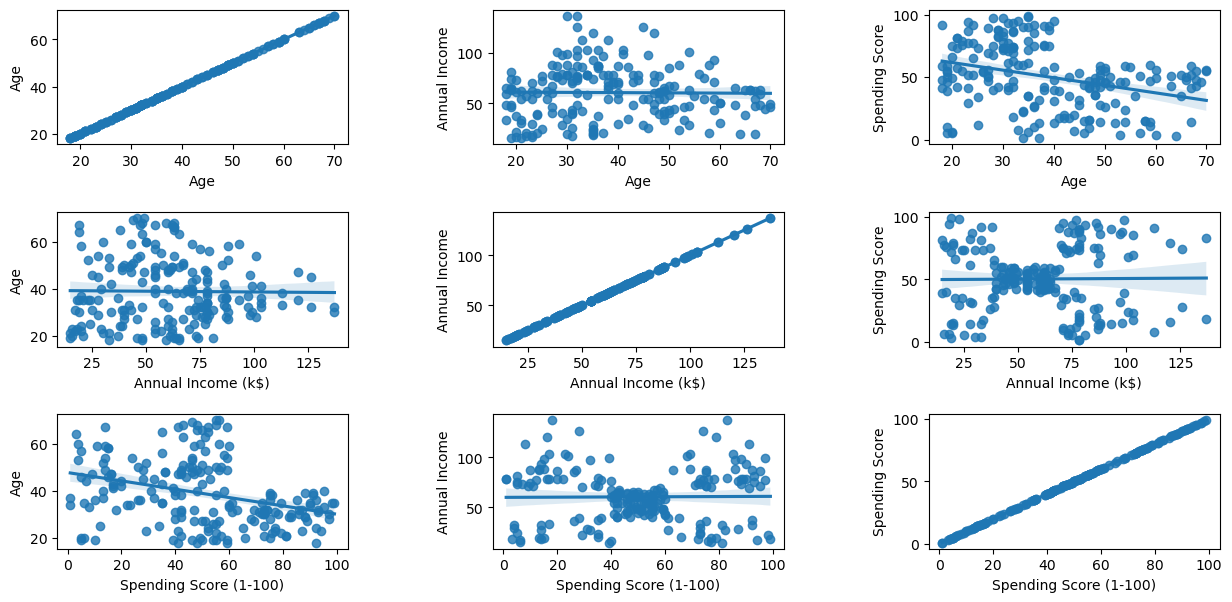

In [13]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

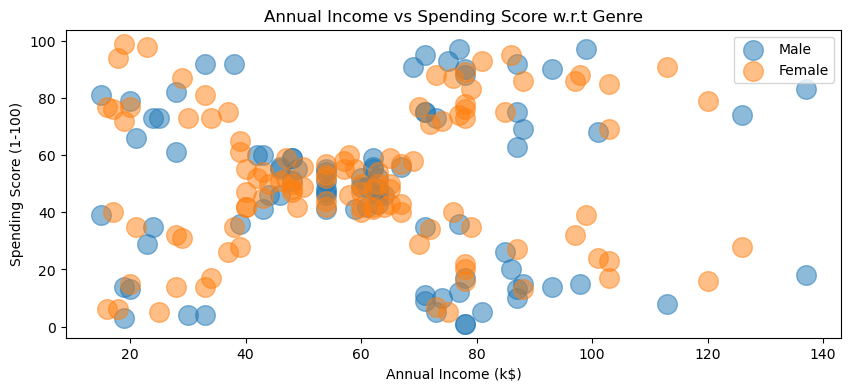

In [14]:
plt.figure(1 , figsize = (10 , 4))
for genre in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Genre'] == genre] ,s = 200 , alpha = 0.5 , label = genre)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Genre')
plt.legend()
plt.show()

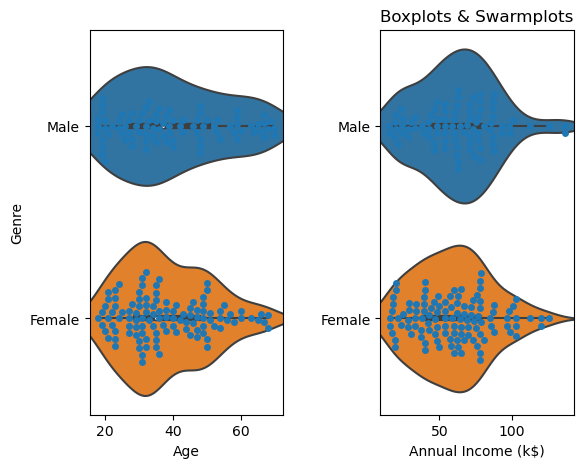

In [15]:
plt.figure(1 , figsize = (10 , 5))
n = 0 
for cols in ['Age' , 'Annual Income (k$)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Genre' , data = df )
    sns.swarmplot(x = cols , y = 'Genre' , data = df)
    plt.ylabel('Genre' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

# Clustering using K- means

In [16]:
x = df.iloc[:, -2:]

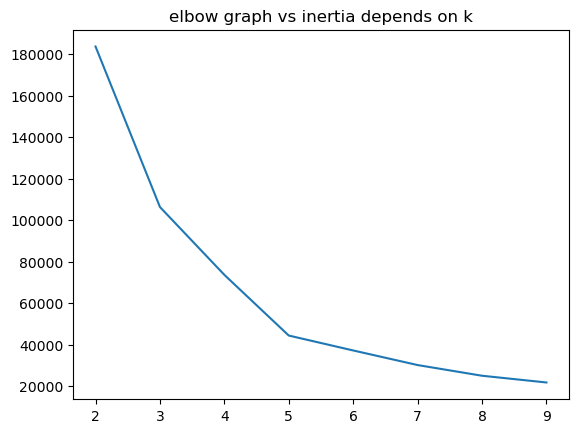

In [17]:
km_inertias, km_scores = [], []

for k in range(2, 10):
    km = KMeans(n_clusters=k).fit(x)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(x, km.labels_))
sns.lineplot(x=range(2,10), y=km_inertias)
plt.title('elbow graph vs inertia depends on k')
plt.show()

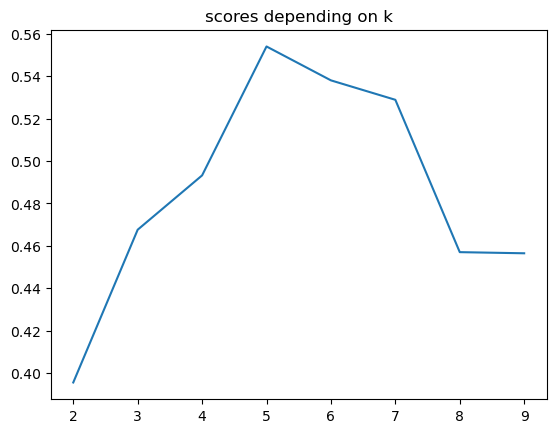

In [18]:
sns.lineplot(x=range(2, 10), y=km_scores)
plt.title('scores depending on k')
plt.show()

In [19]:
km = KMeans(n_clusters=5).fit(x)

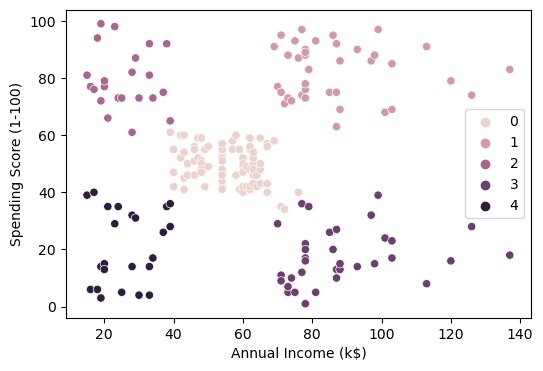

In [20]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=x.iloc[:, 0], y=x.iloc[:, 1], hue=km.labels_)
plt.show()

In [21]:
x['label'] = km.labels_

In [22]:
x.label.value_counts()

label
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

In [23]:
for k in range(5):
    print(f'cluster  : {k}')
    print(x[x.label == k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster  : 0
       Annual Income (k$)  Spending Score (1-100)
count           81.000000               81.000000
mean            55.296296               49.518519
min             39.000000               34.000000
max             76.000000               61.000000



cluster  : 1
       Annual Income (k$)  Spending Score (1-100)
count           39.000000               39.000000
mean            86.538462               82.128205
min             69.000000               63.000000
max            137.000000               97.000000



cluster  : 2
       Annual Income (k$)  Spending Score (1-100)
count           22.000000               22.000000
mean            25.727273               79.363636
min             15.000000               61.000000
max             39.000000               99.000000



cluster  : 3
       Annual Income (k$)  Spending Score (1-100)
count                35.0               35.000000
mean                 88.2               17.114286
min                  70.0              

In [24]:
x[x.label == 1].describe().iloc[[0, 1, 3, 7], :-1]

,Annual Income (k$),Spending Score (1-100)
count,39.000000,39.000000
mean,86.538462,82.128205
min,69.000000,63.000000
max,137.000000,97.000000
